# PREDICTING DEPRESSION FROM MENTAL HEALTH SURVEY DATA USING DEEP LEARNING

## 1) DATA PREPROCESSING

### INSTALL AND IMPORT REQUIRED PACKAGES

In [108]:
!pip install pandas numpy scikit-learn torch torchvision

In [109]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from torch.utils.data import DataLoader, TensorDataset, random_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### 1.1) LOAD THE DATASETS

In [3]:
train_df = pd.read_csv("/content/train.csv")

In [4]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
test_df = pd.read_csv("/content/test.csv")

In [6]:
test_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [7]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
test_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [9]:
train_df.shape

(140700, 20)

In [10]:
test_df.shape

(93800, 19)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

### 1.2) HANDLING MISSING VALUES

In [13]:
train_df.drop(columns=["id", "Name"], inplace=True)
test_df.drop(columns=["id", "Name"], inplace=True)

In [14]:
categorical_cols = ["Profession", "Dietary Habits", "Degree"]
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

In [15]:
numerical_cols = ["Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction"]
for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

In [16]:
train_df["Financial Stress"].fillna(train_df["Financial Stress"].median(), inplace=True)

In [17]:
train_df.isna().sum(), test_df.isna().sum()

(Gender                                   0
 Age                                      0
 City                                     0
 Working Professional or Student          0
 Profession                               0
 Academic Pressure                        0
 Work Pressure                            0
 CGPA                                     0
 Study Satisfaction                       0
 Job Satisfaction                         0
 Sleep Duration                           0
 Dietary Habits                           0
 Degree                                   0
 Have you ever had suicidal thoughts ?    0
 Work/Study Hours                         0
 Financial Stress                         0
 Family History of Mental Illness         0
 Depression                               0
 dtype: int64,
 Gender                                   0
 Age                                      0
 City                                     0
 Working Professional or Student          0
 Profession      

In [18]:
train_df.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

### 1.3) ENCODING CATEGORICAL VARIABLES

In [19]:
categorical_columns = train_df.select_dtypes(include=["object"]).columns.tolist()

le_dict = {}

for col in categorical_columns:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

    le = LabelEncoder()

    train_labels = list(train_df[col].unique()) + ["Unknown"]
    le.fit(train_labels)
    le_dict[col] = le

    train_df[col] = le.transform(train_df[col])

    test_df[col] = test_df[col].apply(lambda x: x if x in train_labels else "Unknown")

    test_df[col] = le.transform(test_df[col])

print("Categorical Encoding Complete!")

Categorical Encoding Complete!


### 1.4) NORMALIZE CONTINUOUS FEATURES

In [20]:
numerical_columns = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_columns.remove("Depression")  # Exclude target variable

scaler = MinMaxScaler()

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

print("Continuous features normalized successfully!")

Continuous features normalized successfully!


In [21]:
train_df["Depression"].value_counts()

,count
Depression,
0,115133
1,25567


### 2) HANDLING CLASS IMBALANCE

### 2.1) OVERSAMPLING

In [22]:
smote = SMOTE(sampling_strategy="auto", random_state=42)

In [23]:
smote

SMOTE(random_state=42)

### 2.2) SPLIT FEATURES AND TARGET

In [24]:
X_train, y_train = train_df.drop(columns=["Depression"]), train_df["Depression"]

In [25]:
X_test = test_df.values

In [26]:
X_train

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.0,0.738095,0.510204,1.0,0.156250,0.50,1.00,0.551308,0.50,0.25,0.805556,0.304348,0.286957,0.0,0.083333,0.25,0.0
1,1.0,0.190476,0.959184,1.0,0.859375,0.50,0.75,0.551308,0.50,0.50,0.750000,0.869565,0.547826,1.0,0.583333,0.50,0.0
2,1.0,0.357143,1.000000,0.0,0.859375,1.00,0.50,0.792757,0.25,0.50,0.416667,0.304348,0.182609,1.0,0.250000,0.00,0.0
3,1.0,0.095238,0.653061,1.0,0.859375,0.50,1.00,0.551308,0.50,0.00,0.750000,0.652174,0.243478,1.0,0.833333,0.00,1.0
4,0.0,0.285714,0.377551,1.0,0.140625,0.50,0.00,0.551308,0.50,0.00,0.416667,0.869565,0.243478,1.0,0.750000,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0.0,0.000000,0.040816,1.0,0.859375,0.50,1.00,0.551308,0.50,0.75,0.416667,0.869565,0.391304,0.0,0.166667,0.75,1.0
140696,0.0,0.547619,0.265306,1.0,0.234375,0.50,1.00,0.551308,0.50,0.75,0.527778,0.652174,0.208696,1.0,0.500000,1.00,1.0
140697,0.0,0.142857,0.448980,1.0,0.593750,0.50,0.50,0.551308,0.50,0.00,0.805556,0.652174,0.165217,0.0,0.333333,0.75,0.0
140698,0.0,0.738095,0.857143,1.0,0.734375,0.50,1.00,0.551308,0.50,0.25,0.416667,0.652174,0.730435,1.0,0.833333,0.00,0.0


In [27]:
y_train

,Depression
0,0
1,1
2,1
3,1
4,0
...,...
140695,1
140696,0
140697,0
140698,0


In [28]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [29]:
X_resampled

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.0,0.738095,0.510204,1.0,0.156250,0.5,1.00,0.551308,0.500000,0.250000,0.805556,0.304348,0.286957,0.0,0.083333,0.250000,0.0
1,1.0,0.190476,0.959184,1.0,0.859375,0.5,0.75,0.551308,0.500000,0.500000,0.750000,0.869565,0.547826,1.0,0.583333,0.500000,0.0
2,1.0,0.357143,1.000000,0.0,0.859375,1.0,0.50,0.792757,0.250000,0.500000,0.416667,0.304348,0.182609,1.0,0.250000,0.000000,0.0
3,1.0,0.095238,0.653061,1.0,0.859375,0.5,1.00,0.551308,0.500000,0.000000,0.750000,0.652174,0.243478,1.0,0.833333,0.000000,1.0
4,0.0,0.285714,0.377551,1.0,0.140625,0.5,0.00,0.551308,0.500000,0.000000,0.416667,0.869565,0.243478,1.0,0.750000,0.750000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230261,0.0,0.082773,0.167731,0.0,0.859375,1.0,0.50,0.786280,0.000000,0.500000,0.750000,0.546188,0.294568,1.0,0.949215,0.173823,1.0
230262,1.0,0.280708,0.457213,0.0,0.859375,0.5,0.50,0.816990,0.533618,0.500000,0.557661,0.869565,0.597810,0.0,1.000000,1.000000,1.0
230263,0.0,0.044901,0.867929,0.0,0.859375,1.0,0.50,0.822775,0.000000,0.500000,0.521435,0.857155,0.391304,1.0,0.264272,0.750000,1.0
230264,0.0,0.002732,0.935263,1.0,0.859375,0.5,0.50,0.551308,0.500000,0.764341,0.543712,0.304348,0.391304,1.0,0.759561,0.750000,0.0


In [30]:
y_resampled

,Depression
0,0
1,1
2,1
3,1
4,0
...,...
230261,1
230262,1
230263,1
230264,1


In [31]:
train_df_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
train_df_resampled["Depression"] = y_resampled

In [32]:
train_df_resampled

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.0,0.738095,0.510204,1.0,0.156250,0.5,1.00,0.551308,0.500000,0.250000,0.805556,0.304348,0.286957,0.0,0.083333,0.250000,0.0,0
1,1.0,0.190476,0.959184,1.0,0.859375,0.5,0.75,0.551308,0.500000,0.500000,0.750000,0.869565,0.547826,1.0,0.583333,0.500000,0.0,1
2,1.0,0.357143,1.000000,0.0,0.859375,1.0,0.50,0.792757,0.250000,0.500000,0.416667,0.304348,0.182609,1.0,0.250000,0.000000,0.0,1
3,1.0,0.095238,0.653061,1.0,0.859375,0.5,1.00,0.551308,0.500000,0.000000,0.750000,0.652174,0.243478,1.0,0.833333,0.000000,1.0,1
4,0.0,0.285714,0.377551,1.0,0.140625,0.5,0.00,0.551308,0.500000,0.000000,0.416667,0.869565,0.243478,1.0,0.750000,0.750000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230261,0.0,0.082773,0.167731,0.0,0.859375,1.0,0.50,0.786280,0.000000,0.500000,0.750000,0.546188,0.294568,1.0,0.949215,0.173823,1.0,1
230262,1.0,0.280708,0.457213,0.0,0.859375,0.5,0.50,0.816990,0.533618,0.500000,0.557661,0.869565,0.597810,0.0,1.000000,1.000000,1.0,1
230263,0.0,0.044901,0.867929,0.0,0.859375,1.0,0.50,0.822775,0.000000,0.500000,0.521435,0.857155,0.391304,1.0,0.264272,0.750000,1.0,1
230264,0.0,0.002732,0.935263,1.0,0.859375,0.5,0.50,0.551308,0.500000,0.764341,0.543712,0.304348,0.391304,1.0,0.759561,0.750000,0.0,1


In [33]:
train_df_resampled["Depression"]

,Depression
0,0
1,1
2,1
3,1
4,0
...,...
230261,1
230262,1
230263,1
230264,1


In [34]:
print("After SMOTE:", train_df_resampled["Depression"].value_counts())

After SMOTE: Depression
0    115133
1    115133
Name: count, dtype: int64


### 2.3) CORRELATION ANALYSIS

In [35]:
correlation_matrix = train_df.corr()

In [36]:
print(correlation_matrix["Depression"].sort_values(ascending=False))

Depression                               1.000000
Have you ever had suicidal thoughts ?    0.349066
Academic Pressure                        0.316944
Profession                               0.283113
Financial Stress                         0.227232
Work/Study Hours                         0.191746
Dietary Habits                           0.143415
Work Pressure                            0.137988
Family History of Mental Illness         0.016502
Sleep Duration                           0.014453
Gender                                   0.008144
City                                    -0.020941
CGPA                                    -0.023050
Degree                                  -0.045547
Job Satisfaction                        -0.103058
Study Satisfaction                      -0.114377
Working Professional or Student         -0.520790
Age                                     -0.564671
Name: Depression, dtype: float64


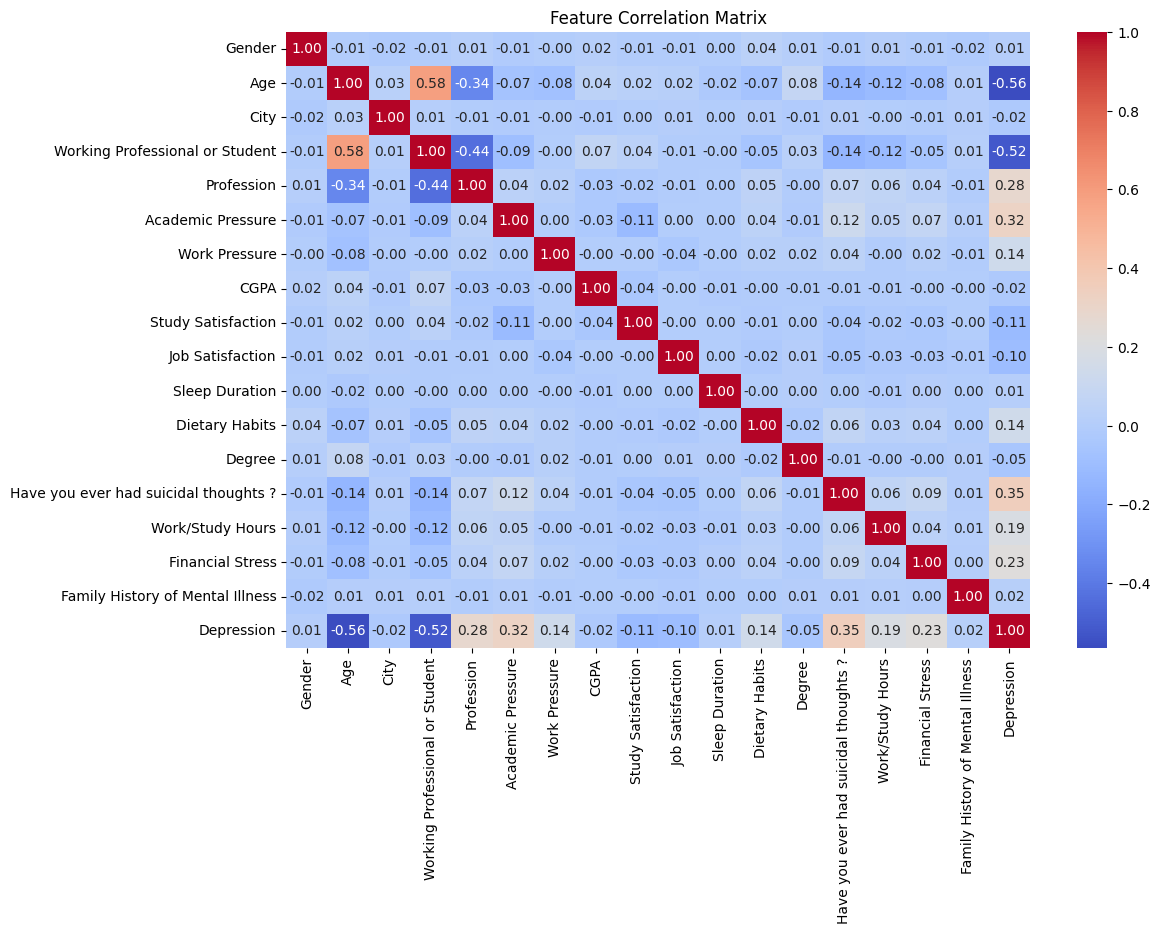

In [37]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Matrix")
plt.show()

In [38]:
high_correlation_features = correlation_matrix["Depression"].abs().sort_values(ascending=False)
high_correlation_features = high_correlation_features[high_correlation_features > 0.3]

print("Features highly correlated with Depression:")
print(high_correlation_features)

Features highly correlated with Depression:
Depression                               1.000000
Age                                      0.564671
Working Professional or Student          0.520790
Have you ever had suicidal thoughts ?    0.349066
Academic Pressure                        0.316944
Name: Depression, dtype: float64


### 2.4) TRAIN TEST SPLIT

In [39]:
X = train_df_resampled.drop(columns=["Depression"]).values
y = train_df_resampled["Depression"].values

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (184212, 17)
Validation set shape: (46054, 17)


### 3) MODEL DEVELOPMENT

### 3.1) MLP CLASSIFIER

In [42]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

### CONVERT DATA TO PYTORCH TENSORS

In [43]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

In [44]:
X_train_tensor

tensor([[1.0000, 0.6190, 1.0000,  ..., 0.8333, 0.2500, 1.0000],
        [1.0000, 0.3810, 1.0000,  ..., 1.0000, 0.2500, 1.0000],
        [1.0000, 0.9762, 0.3673,  ..., 0.5000, 0.0000, 0.0000],
        ...,
        [1.0000, 0.1905, 0.3367,  ..., 0.8333, 0.5000, 1.0000],
        [1.0000, 0.1947, 0.7738,  ..., 0.5000, 0.7500, 0.0000],
        [0.0000, 0.3035, 0.2653,  ..., 0.1876, 1.0000, 0.0000]])

In [45]:
y_train_tensor

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]])

In [46]:
X_val_tensor

tensor([[1.0000, 0.5238, 0.9388,  ..., 0.7500, 0.0000, 0.0000],
        [1.0000, 0.1836, 0.2229,  ..., 0.0594, 0.8392, 0.0000],
        [1.0000, 0.9762, 0.2245,  ..., 0.0833, 0.0000, 1.0000],
        ...,
        [1.0000, 0.0238, 0.2653,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0952, 0.7253,  ..., 0.8589, 0.9233, 0.0000],
        [0.0000, 0.1905, 0.2653,  ..., 0.0833, 0.2500, 0.0000]])

In [47]:
y_val_tensor

tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [48]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [49]:
train_dataset

In [50]:
val_dataset

In [51]:
train_loader

In [52]:
val_loader

### TRAIN THE MODEL

In [53]:
input_dim = X_train.shape[1]

In [54]:
model = MLPClassifier(input_dim)

In [55]:
model

MLPClassifier(
  (model): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [56]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [57]:
criterion

BCELoss()

In [58]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [59]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1/10, Loss: 0.2142
Epoch 2/10, Loss: 0.1986
Epoch 3/10, Loss: 0.1970
Epoch 4/10, Loss: 0.1963
Epoch 5/10, Loss: 0.1953
Epoch 6/10, Loss: 0.1940
Epoch 7/10, Loss: 0.1931
Epoch 8/10, Loss: 0.1927
Epoch 9/10, Loss: 0.1924
Epoch 10/10, Loss: 0.1919


### 3.2) EVALUATE THE MODEL

In [60]:
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            predicted = (outputs > 0.5).float()  # Convert probabilities to binary 0/1
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)
    return correct / total

train_acc = evaluate(model, train_loader)
val_acc = evaluate(model, val_loader)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

Training Accuracy: 0.9290
Validation Accuracy: 0.9264


In [61]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     23027
         1.0       0.92      0.94      0.93     23027

    accuracy                           0.93     46054
   macro avg       0.93      0.93      0.93     46054
weighted avg       0.93      0.93      0.93     46054



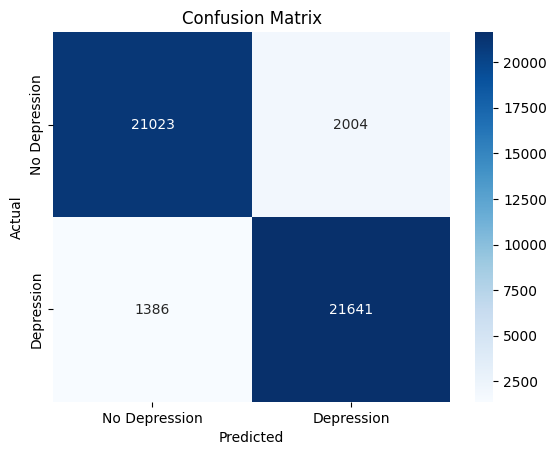

In [62]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
model.eval()
with torch.no_grad():
    test_preds = model(torch.tensor(X_test, dtype=torch.float32)).squeeze()
    test_preds = (test_preds > 0.5).int()
print("Sample test predictions:", test_preds[:10].tolist())

Sample test predictions: [0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


In [64]:
adjusted_threshold = 0.4
test_preds_adjusted = (test_preds > adjusted_threshold).int()
print(test_preds_adjusted[:10].tolist())

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


In [65]:
import numpy as np
unique, counts = np.unique(test_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 71357, 1: 22443}


In [66]:
print(train_df_resampled["Depression"].value_counts())


Depression
0    115133
1    115133
Name: count, dtype: int64


In [67]:
adjusted_threshold = 0.4
test_preds_adjusted = (test_preds > adjusted_threshold).int()
print(np.unique(test_preds_adjusted, return_counts=True))


(array([0, 1], dtype=int32), array([71357, 22443]))


In [68]:
threshold = 0.4

def evaluate(model, dataloader, threshold=0.5):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            predicted = (outputs > threshold).float()
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())

    acc = correct / total
    return acc, all_preds, all_labels

train_acc, train_preds, train_labels = evaluate(model, train_loader, threshold)
val_acc, val_preds, val_labels = evaluate(model, val_loader, threshold)

print(f"Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")
print(f"Sample Predictions: {val_preds[:10]}")


Train Accuracy: 0.9260, Validation Accuracy: 0.9234
Sample Predictions: [array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]


In [69]:
class DepressionMLP(nn.Module):
    def __init__(self, input_size):
        super(DepressionMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x


In [70]:
unique, counts = np.unique(val_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 21597, 1.0: 24457}


In [71]:
print(classification_report(val_labels, val_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     23027
         1.0       0.90      0.95      0.93     23027

    accuracy                           0.92     46054
   macro avg       0.92      0.92      0.92     46054
weighted avg       0.92      0.92      0.92     46054



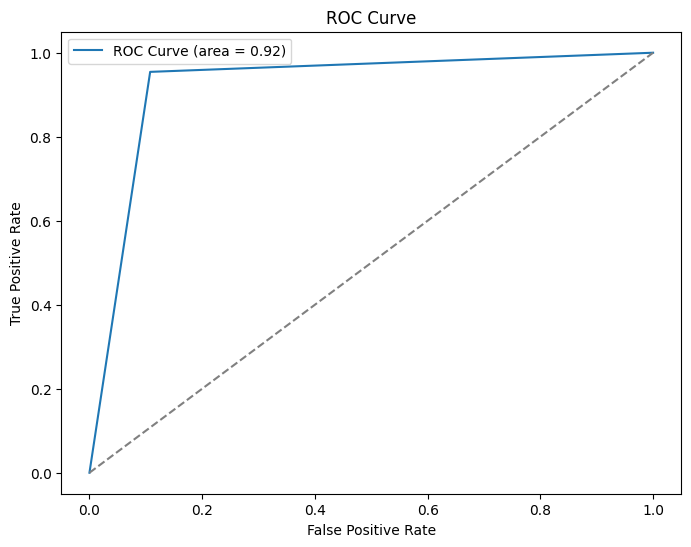

In [72]:
fpr, tpr, _ = roc_curve(val_labels, val_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### SAVE THE MODEL

In [73]:
torch.save(model.state_dict(), "depression_model.pth")

print("Model saved successfully!")

Model saved successfully!
